In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/Users/mansimran/TEP_Faulty_Training.csv', on_bad_lines='skip')


In [4]:
df2 = pd.read_csv('/Users/mansimran/TEP_FaultFree_Training.csv', on_bad_lines='skip')

In [5]:
df_test = pd.read_csv('/Users/mansimran/TEP_Faulty_Testing.csv', on_bad_lines='skip')
df2_test = pd.read_csv('/Users/mansimran/TEP_FaultFree_Testing.csv', on_bad_lines='skip')

In [6]:
df = df.loc[(df['simulationRun']<51),:]
#df2 = df2.loc[(df2['simulationRun']<51),:]

In [7]:
df_test = df_test.loc[(df_test['simulationRun']<41),:]
df2_test = df2_test.loc[(df2_test['simulationRun']<201),:]
combined_df_test = pd.concat([df_test, df2_test], ignore_index=True)
x_test = combined_df_test.drop(columns=['faultNumber','simulationRun'])
y_test = combined_df_test['faultNumber']

In [8]:
combined_df = pd.concat([df, df2], ignore_index=True)


In [ ]:
newgroup=df.groupby("sample").mean()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

num_features = combined_df.iloc[:,3:].select_dtypes(include=['float64', 'int64'])

faultnumber = combined_df['faultNumber'].unique()

k=0

faultnumber.sort()

plt.figure(figsize=(24, 24))
features_to_plot = ['xmeas_2','xmeas_5', 'xmeas_12', 'xmeas_14', 'xmeas_15', 'xmeas_17', 'xmeas_37','xmv_7', 'xmv_8']
for column in features_to_plot:
    k=k+1
    plt.subplot(3, 3, k)
    for fault in faultnumber:
        subset = combined_df[combined_df['faultNumber'] == fault][column]
        sns.kdeplot(subset, label=f'Fault {fault}', fill=True, common_norm=False, alpha=0.3)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Density')
plt.legend()
plt.show()

#From here, I see xmeas_2, xmeas_17, xmeas_37, xmv_1, xmv_11

In [ ]:
plt.figure(figsize=(40,40))
cormatrix=combined_df.corr()
sns.heatmap(cormatrix, fmt=".1g",cmap='coolwarm',annot=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['xmeas_2','xmeas_5', 'xmeas_12', 'xmeas_14', 'xmeas_15', 'xmeas_17', 'xmeas_37','xmv_7', 'xmv_8']
k=0

#xmeas_5 is important for 19?

plt.figure(figsize=(18, 36))
for feature in features_to_plot:
    k=k+1
    plt.subplot(5, 2, k)
    sns.boxplot(x='faultNumber', y=feature, data=combined_df)
    plt.title(f'Box Plot of {feature} by Fault Type',fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'DarkRed'})
    plt.xlabel('Fault Type')
    plt.ylabel(feature)
plt.show()

In [ ]:
sett = combined_df[combined_df['simulationRun']== 1]

sett

In [ ]:
selected_features = ['xmeas_2', 'xmeas_14', 'xmeas_17', 'xmeas_37', 'xmeas_40', 'xmv_1', 'xmv_2', 'xmv_11']
fault_types = [0, 1, 2, 12, 13, 18]

plt.figure(figsize=(14, 24))  # Create a new figure for each feature
k=0
for feature in selected_features:
    k=k+1
    plt.subplot(4,2,k)
    for fault in fault_types:
        subset = sett[sett['faultNumber'] == fault]
        plt.plot(subset['sample'], subset[feature], label=f'Fault {fault}', alpha=0.7)

    plt.title(f'Time Series of {feature} for Different Fault Types', fontdict={'fontsize': 12, 'fontweight': 'bold'})
    plt.ylabel(feature)
    plt.xlabel('Time Index')
    plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()

sd_df = sd.fit_transform(combined_df)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

columns = df.columns
pca=PCA()
pca.fit_transform(sd_df)

component_var = pca.explained_variance_ratio_

plt.scatter(range(1, len(component_var) + 1),component_var.cumsum())
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

loadings = pd.DataFrame(np.abs(pca.components_), columns=columns)

print("Loadings of the first principal component:")
print(loadings.iloc[0].sort_values(ascending=False))

M = loadings.iloc[0:20]

M.drop(columns=[''])

M.loc[:,M.columns~=].mean().nlargest(10)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_components = 5

J = M.reset_index().iloc[:5,0]

loadings2=pca.components_

loadings_df = pd.DataFrame(loadings2[:num_components, 3:], columns=x_df.columns[1:])

plt.figure(figsize=(40, 40))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.xlabel('Feature')
plt.ylabel('Principal Component')
plt.show()



In [ ]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(sd_df)

feature_pca =['PC1', 'PC2', 'PC3', 'PC4']

pca_df = pd.DataFrame(data=pca_result, columns=feature_pca)
pca_df['faultNumber'] = combined_df['faultNumber']
i=0
k=0

plt.figure(figsize=(24, 24))
for feat1 in feature_pca:
    i=i+1
    j=0
    for feat2 in feature_pca:
        j=j+1
        if i < j:
            k=k+1
            plt.subplot(3,2,k)
            sns.scatterplot(x=feat1, y=feat2, hue='faultNumber', data=pca_df, palette='tab10', alpha=0.7)
            plt.title('PCA of Dataset')
            plt.xlabel(f'Principal Component {feat1}')
            plt.ylabel(f'Principal Component {feat2}')
            plt.legend(title='Fault Type', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

In [ ]:
def ffttransform(clean_df, feature, mask, run, window):
    !pip install scipy numpy

    import numpy as np
    from scipy.signal import stft
    import matplotlib.pyplot as plt

    t = np.linspace(0, 24*60, 480)  # Time in minutes
    fs = 1/180  # Sampling frequency in Hz (1 sample per 180 seconds)

    signal = clean_df.loc[mask, feature]
    frequencies, times, Zxx = stft(signal, fs, nperseg=window)
    magnitude = np.abs(Zxx)
    max_freqs = frequencies[np.argmax(magnitude, axis=0)]


    return  max_freqs
feature = clean_df.columns.difference(['faultNumber', 'simulationRun', 'sample'])[1]
mask = (clean_df['faultNumber'] == 0) & (clean_df['simulationRun'] == 1)
run = clean_df[clean_df['faultNumber'] == 0]['simulationRun'].unique()
window = 20
max_freqs = ffttransform(clean_df, feature, mask, run, window)

max_freqs.size

In [ ]:
from scipy.signal import stft
import matplotlib.pyplot as plt
print(clean_df.loc[mask, feature])
max_freqs = stft(clean_df.loc[mask, feature], 1, nperseg=20)
data_frame = pd.DataFrame(max_freqs)
print(data_frame.shape)
print(stft(clean_df.loc[mask, feature], 1, nperseg=20))

In [ ]:
range(len(clean_df.loc[mask, feature]))
window_size = 40
i =500
import numpy as np
np.abs(np.fft.fft(clean_df.loc[mask, feature][i-window_size:i])[1:]).max()
frequency_feat = [np.nan] * len(clean_df.loc[mask, feature])
frequency_feat

In [9]:
features_to_plot = df2.columns[[25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
def featureengg(combined_df, features_to_plot):
    import pandas as pd
    from collections import defaultdict
    import numpy as np

    # Assuming combined_df, features_to_plot are defined earlier
    clean_df = combined_df.drop(columns=features_to_plot).copy()

    window_size = 20  # Adjust based on your requirements
    j = [2, 4, 6, 8]  # Your lag intervals
    m = [1, 5, 20]

    # Initialize a dictionary to hold new columns
    new_columns = defaultdict(list)

    # Loop through faults and runs
    for fault in clean_df['faultNumber'].unique():
        for run in clean_df[clean_df['faultNumber'] == fault]['simulationRun'].unique():
            mask = (clean_df['faultNumber'] == fault) & (clean_df['simulationRun'] == run)

            for feature in clean_df.columns.difference(['faultNumber', 'simulationRun', 'sample']):
                frequency_feat = [np.nan] * len(clean_df.loc[mask, feature])
                feature_ma = f'{feature}_MA'
                feature_std = f'{feature}_STD'

                # Calculate moving average and standard deviation
                ma = clean_df.loc[mask, feature].rolling(window=window_size, min_periods=1).mean()
                std = clean_df.loc[mask, feature].rolling(window=window_size, min_periods=1).std()


                new_columns[feature_ma].extend(ma)
                new_columns[feature_std].extend(std)

            # Calculate and store lagged features
                for i in j:
                    lag_name = f'{feature}_lag{i}'
                    lag = clean_df.loc[mask, feature].shift(i)
                    new_columns[lag_name].extend(lag)
                    

                feature_f = f'{feature}_frequency'
                for i in range(len(clean_df.loc[mask, feature])):
                    if i < window_size:
                        frequency_feat[i] = np.nan
                    else:
                        frequency_feat[i] = np.abs(np.fft.fft(clean_df.loc[mask, feature][i-window_size:i])[1:]).max()

                new_columns[feature_f].extend(frequency_feat)

            for n in m:
                lag_name2 = f'fault_lag{n}'
                lag = clean_df.loc[mask, 'faultNumber'].shift(n)
                new_columns[lag_name2].extend(lag)

# Convert lists in new_columns to Pandas Series, ensuring they match the original DataFrame's index
    for key in new_columns:
        new_columns[key] = pd.Series(new_columns[key], index=clean_df.index)

# Now you can safely convert new_columns to a DataFrame and concatenate it with clean_df_test
    new_columns_df = pd.DataFrame(new_columns)
    clean_df = pd.concat([clean_df, new_columns_df], axis=1)
    return clean_df

In [10]:
clean_df = featureengg(combined_df, features_to_plot)

columns_list = x_df.columns.tolist()
clean_df_cleaned = clean_df.dropna(axis=0)
print(columns_list)
clean_df_test_cleaned['faultNumber'] = (clean_df_test_cleaned['faultNumber'] > 0).astype(int)
comb_x_df = clean_df_cleaned.drop(columns=['faultNumber','simulationRun','sample'])
comb_y_df = clean_df_cleaned['faultNumber']

print(clean_df.columns.size)
print(clean_df.shape)
print(clean_df_cleaned.shape)
print(comb_y_df.sum())



KeyboardInterrupt: 

In [29]:
clean_df_test = featureengg(combined_df_test, features_to_plot)

clean_df_test_cleaned = clean_df_test.dropna(axis=0)
print(columns_list)
clean_df_test_cleaned['faultNumber'] = (clean_df_test_cleaned['faultNumber'] > 0).astype(int)
comb_x_df_test = clean_df_test_cleaned.drop(columns=['faultNumber','simulationRun','sample'])
comb_y_df_test = clean_df_test_cleaned['faultNumber']

print(clean_df.columns.size)
print(clean_df.shape)
print(clean_df_cleaned.shape)
print(comb_y_df.sum())

['sample', 'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11']


/var/folders/k8/mhcdfsy54qv7hl6yxz02blx80000gn/T/ipykernel_74307/1419470541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_test_cleaned['faultNumber'] = (clean_df_test_cleaned['faultNumber'] > 0).astype(int)


347
(750000, 347)
(720000, 347)
480000


In [13]:
cleans=clean_df_test.dropna(axis=0)
my_ys = cleans['faultNumber']

NameError: name 'clean_df_test' is not defined

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

A1 = Pipeline([('A_',StandardScaler(with_mean=False))])

A1.fit_transform(comb_x_df)

feature_names = A1.get_feature_names_out()
print(feature_names)
print(len(feature_names))

all_columns = df.columns.tolist()

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_score': make_scorer(f1_score, average='macro', zero_division=0),
    'roc_auc': 'roc_auc_ovr' # Use `roc_auc_ovr` or `roc_auc_ovo` for multiclass ROC AUC
}




param_grid_rfr = {
    'RFR__n_estimators': [200],  # Number of trees in the forest
    'RFR__max_depth': [40],     # Maximum depth of the tree
}
#clf = RandomForestClassifier()
clf = RandomForestClassifier(n_estimators=200, max_depth=40)

#skb = SelectKBest(f_classif, k=300)

#full_pipeline_Kbest = Pipeline([('initial_transform', A1), ('skb', skb), ('RFR', clf)])

full_pipeline_Kbest = Pipeline([('initial_transform', A1), ('RFR', clf)])


#grid_search_rfr = GridSearchCV(estimator=full_pipeline_Kbest, param_grid=param_grid_rfr, cv=2, scoring=scoring, refit='accuracy',return_train_score=True)

#grid_search_rfr.fit(comb_x_df, comb_y_df)

#results = grid_search_rfr.cv_results_

# for metric in scoring.keys():
#     print(f"Best {metric}: {results[f'mean_test_{metric}'][grid_search_rfr.best_index_]}")
#     for mean, std, params in zip(results[f'mean_test_{metric}'], results[f'std_test_{metric}'], results['params']):
#         print(f"{metric} {mean:.3f} (+/-{std * 2:.3f}) for {params}")


# best_classifier = grid_search_rfr.best_estimator_


X_new=full_pipeline_Kbest.fit(comb_x_df, comb_y_df)

predictions_Xtrain = pipeline.predict(comb_x_df)

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

conf_matrix = confusion_matrix(comb_y_df, predictions_Xtrain)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(comb_y_df, predictions_Xtrain, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# Accuracy
accuracy = accuracy_score(comb_y_df, predictions_Xtrain)
print(f"Accuracy: {accuracy}")

################################
predictions = full_pipeline_Kbest.predict(comb_x_df_test)

conf_matrix = confusion_matrix(comb_y_df_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(comb_y_df_test, predictions, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# Accuracy
accuracy = accuracy_score(comb_y_df_test, predictions)
print(f"Accuracy: {accuracy}")

# feature_scores = full_pipeline_Kbest.named_steps['skb'].scores_
# print("Feature scores:", feature_scores)


# selected_features = full_pipeline_Kbest.named_steps['skb'].get_support(indices=True)
# print("Selected features indices: ", selected_features)

# # To get the feature names, assuming X is a DataFrame
# selected_feature_names = feature_names[selected_features]
# print("Selected feature names: ", selected_feature_names)

['xmeas_1' 'xmeas_3' 'xmeas_4' 'xmeas_6' 'xmeas_7' 'xmeas_8' 'xmeas_9'
 'xmeas_10' 'xmeas_11' 'xmeas_13' 'xmeas_16' 'xmeas_18' 'xmeas_19'
 'xmeas_20' 'xmeas_21' 'xmeas_22' 'xmeas_23' 'xmeas_24' 'xmeas_25'
 'xmeas_26' 'xmeas_27' 'xmeas_28' 'xmeas_29' 'xmeas_30' 'xmeas_31'
 'xmeas_32' 'xmeas_33' 'xmeas_34' 'xmeas_35' 'xmeas_36' 'xmeas_38'
 'xmeas_39' 'xmeas_40' 'xmeas_41' 'xmv_1' 'xmv_2' 'xmv_3' 'xmv_4' 'xmv_5'
 'xmv_6' 'xmv_9' 'xmv_10' 'xmv_11' 'xmeas_1_MA' 'xmeas_1_STD'
 'xmeas_1_lag2' 'xmeas_1_lag4' 'xmeas_1_lag6' 'xmeas_1_lag8'
 'xmeas_1_frequency' 'xmeas_10_MA' 'xmeas_10_STD' 'xmeas_10_lag2'
 'xmeas_10_lag4' 'xmeas_10_lag6' 'xmeas_10_lag8' 'xmeas_10_frequency'
 'xmeas_11_MA' 'xmeas_11_STD' 'xmeas_11_lag2' 'xmeas_11_lag4'
 'xmeas_11_lag6' 'xmeas_11_lag8' 'xmeas_11_frequency' 'xmeas_13_MA'
 'xmeas_13_STD' 'xmeas_13_lag2' 'xmeas_13_lag4' 'xmeas_13_lag6'
 'xmeas_13_lag8' 'xmeas_13_frequency' 'xmeas_16_MA' 'xmeas_16_STD'
 'xmeas_16_lag2' 'xmeas_16_lag4' 'xmeas_16_lag6' 'xmeas_16_lag8'
 '

NameError: name 'pipeline' is not defined

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

A1 = Pipeline([('A_',StandardScaler(with_mean=False))])

A1.fit_transform(comb_x_df)

feature_names = A1.get_feature_names_out()
print(feature_names)
print(len(feature_names))

all_columns = df.columns.tolist()

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_score': make_scorer(f1_score, average='macro', zero_division=0),
    'roc_auc': 'roc_auc_ovr' # Use `roc_auc_ovr` or `roc_auc_ovo` for multiclass ROC AUC
}




param_grid_rfr = {
    'RFR__n_estimators': [200],  # Number of trees in the forest
    'RFR__max_depth': [40],     # Maximum depth of the tree
}
#clf = RandomForestClassifier()
clf = RandomForestClassifier(n_estimators=200, max_depth=40)

#skb = SelectKBest(f_classif, k=300)

#full_pipeline_Kbest = Pipeline([('initial_transform', A1), ('skb', skb), ('RFR', clf)])

full_pipeline_Kbest = Pipeline([('initial_transform', A1), ('RFR', clf)])


#grid_search_rfr = GridSearchCV(estimator=full_pipeline_Kbest, param_grid=param_grid_rfr, cv=2, scoring=scoring, refit='accuracy',return_train_score=True)

#grid_search_rfr.fit(comb_x_df, comb_y_df)

#results = grid_search_rfr.cv_results_

# for metric in scoring.keys():
#     print(f"Best {metric}: {results[f'mean_test_{metric}'][grid_search_rfr.best_index_]}")
#     for mean, std, params in zip(results[f'mean_test_{metric}'], results[f'std_test_{metric}'], results['params']):
#         print(f"{metric} {mean:.3f} (+/-{std * 2:.3f}) for {params}")


# best_classifier = grid_search_rfr.best_estimator_


X_new=full_pipeline_Kbest.fit(comb_x_df, comb_y_df)

predictions_Xtrain = full_pipeline_Kbest.predict(comb_x_df)

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

conf_matrix = confusion_matrix(comb_y_df, predictions_Xtrain)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(comb_y_df, predictions_Xtrain, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# Accuracy
accuracy = accuracy_score(comb_y_df, predictions_Xtrain)
print(f"Accuracy: {accuracy}")

################################
predictions = full_pipeline_Kbest.predict(comb_x_df_test)

conf_matrix = confusion_matrix(comb_y_df_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(comb_y_df_test, predictions, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# Accuracy
accuracy = accuracy_score(comb_y_df_test, predictions)
print(f"Accuracy: {accuracy}")

# feature_scores = full_pipeline_Kbest.named_steps['skb'].scores_
# print("Feature scores:", feature_scores)


# selected_features = full_pipeline_Kbest.named_steps['skb'].get_support(indices=True)
# print("Selected features indices: ", selected_features)

# # To get the feature names, assuming X is a DataFrame
# selected_feature_names = feature_names[selected_features]
# print("Selected feature names: ", selected_feature_names)

In [31]:
predictions_Xtrain = full_pipeline_Kbest.predict(comb_x_df)

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

conf_matrix = confusion_matrix(comb_y_df, predictions_Xtrain)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(comb_y_df, predictions_Xtrain, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# Accuracy
accuracy = accuracy_score(comb_y_df, predictions_Xtrain)
print(f"Accuracy: {accuracy}")

################################
predictions = full_pipeline_Kbest.predict(comb_x_df_test)

conf_matrix = confusion_matrix(comb_y_df_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(comb_y_df_test, predictions, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# Accuracy
accuracy = accuracy_score(comb_y_df_test, predictions)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
 [[239998      2]
 [ 27172 452828]]
Precision: 0.9660960437141769
Recall: 0.9622583333333333
F1-Score: 0.962719637627218
Accuracy: 0.9622583333333333
Confusion Matrix:
 [[186871   1129]
 [140402 611598]]
Precision: 0.9127247833407252
Recall: 0.8494351063829787
F1-Score: 0.8621004609448742
Accuracy: 0.8494351063829787


In [14]:
results_df = pd.DataFrame({
    'Actual': comb_y_df_test,
    'Predicted': predictions,
    'Correct': comb_y_df_test == predictions
})

results_df['sample'] = clean_df_test_cleaned['sample']
results_df['simulationRun'] = clean_df_test_cleaned['simulationRun']

plt.figure(figsize=(15, 15))
conf_matrix = confusion_matrix(results_df.loc[results_df['sample']>160,'Actual'],
                               results_df.loc[results_df['sample']>160,'Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

accuracy = accuracy_score(results_df.loc[results_df['sample']>160,'Actual'],
                               results_df.loc[results_df['sample']>160,'Predicted'])
print(f"Accuracy: {accuracy}")

anotherone = results_df.loc[results_df['sample']>160].groupby(['Actual']).agg({'Predicted':'count', 'Correct':'sum'})
anotherone['accuracy'] = anotherone['Correct']/anotherone['Predicted']

print(results_df)

NameError: name 'comb_y_df_test' is not defined

Precision: 0.9602015365294543
Recall: 0.957522340425532
F1-Score: 0.9579833881033678
Accuracy: 0.957522340425532


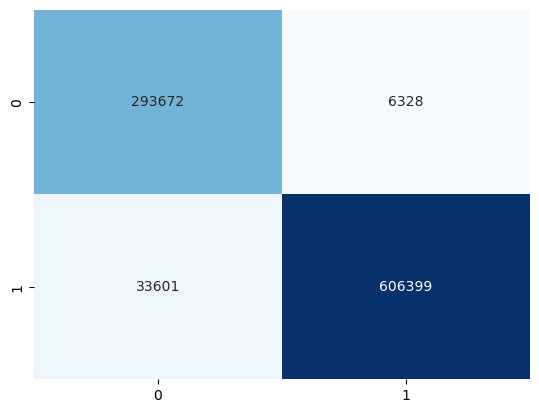

In [125]:
results_df.loc[results_df['sample'] < 161, 'Actual'] = 0
conf_matrix =confusion_matrix(results_df['Actual'],
                               results_df['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
precision, recall, f1, _ = precision_recall_fscore_support(results_df['Actual'], results_df['Predicted'], average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# Accuracy
accuracy = accuracy_score(results_df['Actual'], results_df['Predicted'])
print(f"Accuracy: {accuracy}")

        Actual  Predicted  Correct  simulationRun
sample                                           
21           0         42      238          36500
22           0         21      219          36500
23           0         21      219          36500
24           0         21      219          36500
25           0         21      219          36500
...        ...        ...      ...            ...
956        800        760      960          36500
957        800        760      960          36500
958        800        760      960          36500
959        800        761      961          36500
960        800        760      960          36500

[940 rows x 4 columns]
        Actual  Predicted  Correct  sample  simulationRun
20           0          0    False      21              1
21           0          0    False      22              1
22           0          0    False      23              1
23           0          0    False      24              1
24           0          0    False  

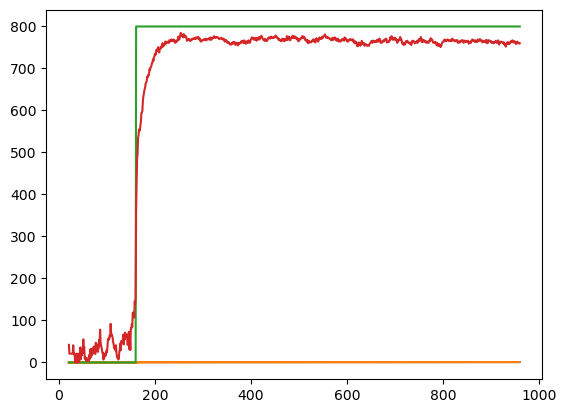

In [126]:
plt.plot(results_df['sample'].loc[0:960],results_df['Actual'].loc[0:960])
plt.plot(results_df['sample'].loc[0:980],results_df['Predicted'].loc[0:980])
#results_df.loc[(results_df['sample']<161) & (results_df['Actual']==0)]
#plt.show()
groupbysample = results_df.groupby(['sample']).sum()
print(groupbysample)

plt.plot(groupbysample['Actual'])
plt.plot(groupbysample['Predicted'])

print(results_df)

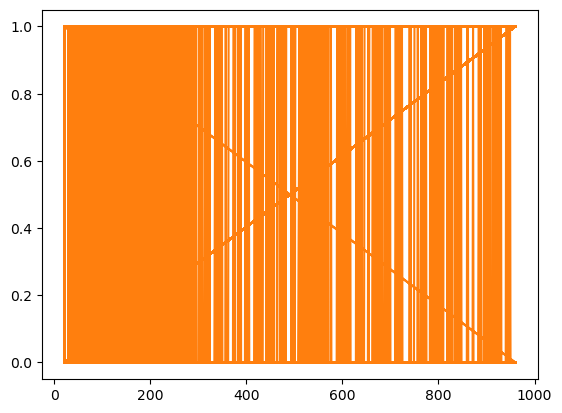

In [134]:
results_df2 = results_df
plt.plot(results_df2['sample'],results_df2['Actual'])
plt.plot(results_df2['sample'],results_df2['Predicted'])

In [135]:
import pandas as pd
import numpy as np

def set_ones_within_blocks(series, block_size=940, threshold=10):
    # Convert the series to a numpy array for efficiency
    arr = series.to_numpy()
    # Calculate the number of blocks
    num_blocks = len(arr) // block_size
    
    for block in range(num_blocks):
        # Calculate start and end indices for the current block
        start_idx = block * block_size
        end_idx = start_idx + block_size
        # This flag is set to True once we find 5 or more consecutive 1s within the block
        make_ones = False
        
        for i in range(start_idx, end_idx):
            # Check if the current element and the next 4 elements are 1 (avoiding index error within the block)
            if i + threshold - 1 < end_idx and np.all(arr[i:i+threshold] == 1):
                make_ones = True
            if make_ones:
                arr[i] = 1
                
    return pd.Series(arr, index=series.index)

# Assuming 'results_df' is your DataFrame and 'Actual' is the column to modify
results_df2['Predicted'] = set_ones_within_blocks(results_df['Predicted'])

# Now, 'results_df' has been modified according to your new criteria

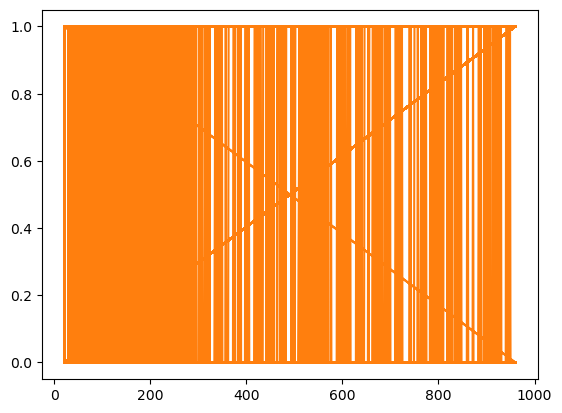

        Actual  Predicted  Correct  simulationRun
sample                                           
21           0         42      238          36500
22           0         21      219          36500
23           0         21      219          36500
24           0         21      219          36500
25           0         21      219          36500
...        ...        ...      ...            ...
956        800        851      960          36500
957        800        851      960          36500
958        800        851      960          36500
959        800        851      961          36500
960        800        851      960          36500

[940 rows x 4 columns]
        Actual  Predicted  Correct  sample  simulationRun
20           0          0    False      21              1
21           0          0    False      22              1
22           0          0    False      23              1
23           0          0    False      24              1
24           0          0    False  

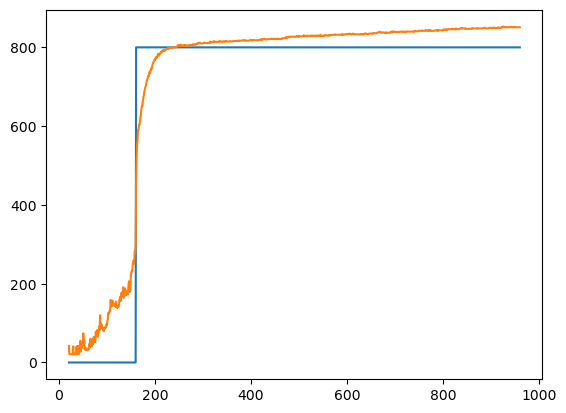

In [136]:
plt.plot(results_df2['sample'],results_df2['Actual'])
plt.plot(results_df2['sample'],results_df2['Predicted'])
plt.show()

groupbysample2 = results_df2.groupby(['sample']).sum()
print(groupbysample2)

plt.plot(groupbysample2['Actual'])
plt.plot(groupbysample2['Predicted'])

print(results_df2)

In [137]:
results_df.loc[results_df['Correct']==False]['Actual'].value_counts().sort_index()

Actual
0    107930
1     33601
Name: count, dtype: int64

In [ ]:
results_df.loc[results_df['Correct']==True,'Actual'].value_counts().sort_index()

In [ ]:
incorrect_counts = results_df.loc[results_df['Correct'] == False, 'Actual'].value_counts().sort_index()
correct_counts = results_df.loc[results_df['Correct'] == True, 'Actual'].value_counts().sort_index()

total_counts = incorrect_counts.add(correct_counts, fill_value=0)
ratio_incorrect = correct_counts / total_counts

print(ratio_incorrect)
print(incorrect_counts.sum())
print(total_counts.sum())

incorrect_counts.sum()/total_counts.sum()

In [ ]:
results_df.loc[(results_df['Correct']==False) & (results_df['Actual']==0),'Predicted'].value_counts()

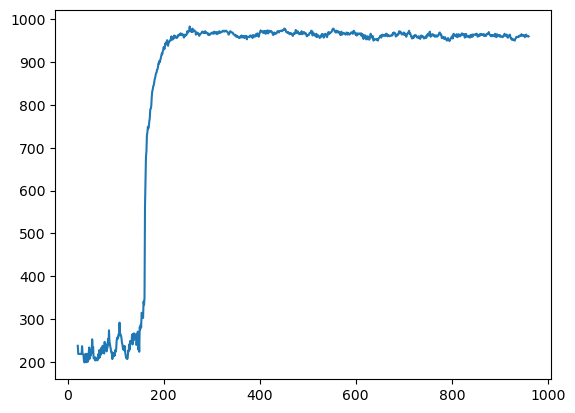

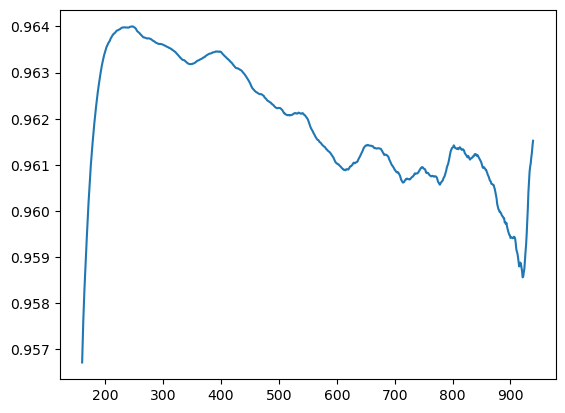

In [48]:
results_df.groupby('sample')['Correct'].sum()
plt.plot(results_df.groupby('sample')['Correct'].sum())
plt.show()
count=[]
accuracy_inc = []

for i in range(len(results_df.groupby('sample')['Correct'].sum())):
    count.append(i)
    accuracy_inc.append(accuracy_score(results_df.loc[results_df['sample']>i,'Actual'],
                               results_df.loc[results_df['sample']>i,'Predicted']))
plt.plot(count[160:],accuracy_inc[160:])
plt.show()

In [ ]:
results_df.loc[results_df['Correct']==False,'Predicted'].value_counts()

In [ ]:
import numpy as np
import random

max_remove = 300

def remove_random_samples(run, max_removal=max_remove):
    """Randomly removes up to max_removal samples from the last 300 samples of the run."""
    if len(run) <= 300:
        raise ValueError("Run is too short for removal process.")
    num_to_remove = random.randint(1, min(max_removal, max_remove))
    removal_start_index = len(run) - max_remove
    removal_indices = sorted(random.sample(range(removal_start_index, len(run)), num_to_remove))
    return np.delete(run, removal_indices), len(run) - removal_indices[0] - 1  # Returns adjusted run and last index before removal

combined_df.loc[(combined_df['simulationRun']==1) & (combined_df['faultNumber']==1)]

In [ ]:
import pandas as pd
import numpy as np
import random
features_to_plot = ['xmeas_2','xmeas_5', 'xmeas_12', 'xmeas_14', 'xmeas_15', 'xmeas_17', 'xmeas_37','xmv_7', 'xmv_8']

def remove_random_samples_from_df(df, max_removal=300):
    """Adjusts a DataFrame by removing a random number of samples from the last 300 rows."""
    max_removal = min(max_removal, len(df) - 1, 300)  # Ensure we don't exceed the DataFrame's length or 300
    n_to_remove = random.randint(1, max_removal)
    n_to_remove = min(n_to_remove, len(df))
    # Remove the last n_to_remove rows
    df_adjusted = df[:-n_to_remove]
    return df_adjusted


def stitch_simulation_runs(combined_df, num_runs, overlap_size=10):
    """Randomly stitches together a specified number of runs from combined_df."""
    stitched_data = pd.DataFrame()
    last_run_df = None

    for _ in range(num_runs):

        faultNumber = random.choices(population=list(range(21)), weights=[100] + [2]*20)[0]
        valid_runs = combined_df[combined_df['faultNumber'] == faultNumber]['simulationRun'].unique()
        simulationRun = random.choice(valid_runs)

        current_run_df = combined_df.loc[(combined_df['simulationRun'] == simulationRun) & (combined_df['faultNumber'] == faultNumber)]
        current_run_df_adjusted = remove_random_samples_from_df(current_run_df, max_removal=300)

        if last_run_df is not None:
            transition_df = create_overlap_with_weighted_average(last_run_df, current_run_df_adjusted, overlap_size=overlap_size)
            stitched_data = pd.concat([stitched_data, transition_df], ignore_index=True)
        else:
            stitched_data = current_run_df_adjusted

        last_run_df = current_run_df_adjusted

    return stitched_data

def create_overlap_with_weighted_average(run1, run2, overlap_size=10):
    if overlap_size > min(len(run1), len(run2)):
        raise ValueError("Overlap size is too large.")

    run1 = run1.reset_index(drop=True)
    run2 = run2.reset_index(drop=True)

    weights = np.linspace(0, 1, overlap_size)

    for col in run1.columns:
        if col in ['simulationRun', 'faultNumber', 'sample']:
            continue
        overlap1 = run1[col].tail(overlap_size).to_numpy()
        overlap2 = run2[col].head(overlap_size).to_numpy()
        weighted_avg = overlap1 * (1 - weights) + overlap2 * weights
        run1.loc[run1.index[-overlap_size:], col] = weighted_avg

    smooth_transition_df = pd.concat([run1, run2.iloc[overlap_size:]], ignore_index=True)
    return smooth_transition_df

In [ ]:
num_runs_to_stitch = 1000  # Example: stitch together 10 runs
overlap_size = 10  # Define the size of the overlap you want between runs

stitched_df = stitch_simulation_runs(combined_df, num_runs_to_stitch, overlap_size)

In [ ]:
stitched_df.loc[stitched_df['sample'] < 21, 'faultNumber'] = 0
comb_y_df_stitch = stitched_df['faultNumber']
stitched_df.drop(columns=['simulationRun','sample', 'faultNumber'],inplace=True)

In [ ]:
stitched_df

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25211,3689.0,4497.4,9.4080,27.299,42.439,2705.0,74.899,120.37,0.33681,...,54.122,24.488,61.113,22.505,40.102,36.938,45.785,47.399,40.645,15.610
1,0.25099,3675.5,4500.5,9.3248,27.262,42.331,2705.0,74.890,120.38,0.33786,...,54.086,24.598,60.767,22.564,39.974,40.476,43.180,47.280,41.522,18.992
2,0.25002,3687.6,4575.1,9.3268,27.214,42.289,2704.5,74.889,120.39,0.33717,...,53.192,24.701,62.584,22.689,40.056,41.452,47.787,47.443,40.460,17.870
3,0.25003,3650.5,4507.1,9.4198,27.004,42.339,2705.3,76.203,120.42,0.33742,...,54.005,24.700,60.109,22.319,40.026,37.314,45.788,47.437,41.678,16.790
4,0.24479,3687.1,4497.3,9.2649,26.710,42.513,2703.5,74.432,120.38,0.32186,...,54.184,24.047,61.519,21.960,39.004,34.585,47.287,47.447,41.086,17.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694379,0.24147,3668.1,4475.5,9.4326,26.896,42.642,2708.6,75.231,120.39,0.35812,...,54.095,23.711,58.863,22.162,42.292,40.831,46.841,49.654,40.978,17.821
694380,0.25214,3670.6,4490.4,9.3913,26.681,42.046,2708.8,74.818,120.39,0.33466,...,54.283,25.138,61.232,22.262,40.076,34.154,43.277,49.639,41.808,17.376
694381,0.25321,3671.5,4520.8,9.2562,27.021,42.539,2706.2,75.027,120.39,0.33357,...,53.918,25.033,61.624,22.088,40.209,35.742,48.019,49.653,40.713,20.187
694382,0.24244,3666.0,4523.6,9.2967,26.669,41.956,2705.6,75.177,120.40,0.34079,...,53.573,23.896,61.698,22.114,40.601,43.603,47.785,49.530,40.897,17.684


In [ ]:
stitched_df

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25211,3689.0,4497.4,9.4080,27.299,42.439,2705.0,74.899,120.37,0.33681,...,54.122,24.488,61.113,22.505,40.102,36.938,45.785,47.399,40.645,15.610
1,0.25099,3675.5,4500.5,9.3248,27.262,42.331,2705.0,74.890,120.38,0.33786,...,54.086,24.598,60.767,22.564,39.974,40.476,43.180,47.280,41.522,18.992
2,0.25002,3687.6,4575.1,9.3268,27.214,42.289,2704.5,74.889,120.39,0.33717,...,53.192,24.701,62.584,22.689,40.056,41.452,47.787,47.443,40.460,17.870
3,0.25003,3650.5,4507.1,9.4198,27.004,42.339,2705.3,76.203,120.42,0.33742,...,54.005,24.700,60.109,22.319,40.026,37.314,45.788,47.437,41.678,16.790
4,0.24479,3687.1,4497.3,9.2649,26.710,42.513,2703.5,74.432,120.38,0.32186,...,54.184,24.047,61.519,21.960,39.004,34.585,47.287,47.447,41.086,17.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694379,0.24147,3668.1,4475.5,9.4326,26.896,42.642,2708.6,75.231,120.39,0.35812,...,54.095,23.711,58.863,22.162,42.292,40.831,46.841,49.654,40.978,17.821
694380,0.25214,3670.6,4490.4,9.3913,26.681,42.046,2708.8,74.818,120.39,0.33466,...,54.283,25.138,61.232,22.262,40.076,34.154,43.277,49.639,41.808,17.376
694381,0.25321,3671.5,4520.8,9.2562,27.021,42.539,2706.2,75.027,120.39,0.33357,...,53.918,25.033,61.624,22.088,40.209,35.742,48.019,49.653,40.713,20.187
694382,0.24244,3666.0,4523.6,9.2967,26.669,41.956,2705.6,75.177,120.40,0.34079,...,53.573,23.896,61.698,22.114,40.601,43.603,47.785,49.530,40.897,17.684


In [ ]:
def featureengg2(combined_df, features_to_plot):
    import pandas as pd
    from collections import defaultdict
    import numpy as np

    # Assuming combined_df, features_to_plot are defined earlier
    clean_df = combined_df.drop(columns=features_to_plot).copy()

    window_size = 50  # Adjust based on your requirements
    j = [2, 4, 6, 8]  # Your lag intervals

    # Initialize a dictionary to hold new columns
    new_columns = defaultdict(list)

    # Loop through faults and runs
    for feature in clean_df.columns:
        print(feature)
        frequency_feat = [np.nan] * len(clean_df[feature])
        feature_ma = f'{feature}_MA'
        feature_std = f'{feature}_STD'

        # Calculate moving average and standard deviation
        ma = clean_df[feature].rolling(window=window_size, min_periods=1).mean()
        std = clean_df[feature].rolling(window=window_size, min_periods=1).std()


        new_columns[feature_ma].extend(ma)
        print(len(ma))
        new_columns[feature_std].extend(std)
        print(len(std))
        # Calculate and store lagged features
        for i in j:
            lag_name = f'{feature}_lag{i}'
            lag = clean_df[feature].shift(i)
            new_columns[lag_name].extend(lag)
            print(len(lag))
        feature_f = f'{feature}_frequency'
        for i in range(len(clean_df[feature])):
            if i < window_size:
                frequency_feat[i] = np.nan
            else:
                frequency_feat[i] = np.abs(np.fft.fft(clean_df[feature][i-window_size:i])[1:]).max()

        new_columns[feature_f].extend(frequency_feat)
        print(len(frequency_feat))



# Convert lists in new_columns to Pandas Series, ensuring they match the original DataFrame's index
    for key in new_columns:
        new_columns[key] = pd.Series(new_columns[key], index=clean_df.index)

# Now you can safely convert new_columns to a DataFrame and concatenate it with clean_df_test
    new_columns_df = pd.DataFrame(new_columns)
    clean_df = pd.concat([clean_df, new_columns_df], axis=1)
    return clean_df

In [ ]:
clean_df_stitch = featureengg2(stitched_df, features_to_plot)

columns_list = x_df.columns.tolist()
clean_df_cleaned_stich = clean_df_stitch.dropna(axis=0)

comb_x_df_stitch = clean_df_cleaned_stich


xmeas_1
694384
694384
694384
694384
694384
694384
694384
xmeas_3
694384
694384
694384
694384
694384
694384
694384
xmeas_4
694384
694384
694384
694384
694384
694384
694384
xmeas_6
694384
694384
694384
694384
694384
694384
694384
xmeas_7
694384
694384
694384
694384
694384
694384
694384
xmeas_8
694384
694384
694384
694384
694384
694384
694384
xmeas_9
694384
694384
694384
694384
694384
694384
694384
xmeas_10
694384
694384
694384
694384
694384
694384
694384
xmeas_11
694384
694384
694384
694384
694384
694384
694384
xmeas_13
694384
694384
694384
694384
694384
694384
694384
xmeas_16
694384
694384
694384
694384
694384
694384
694384
xmeas_18
694384
694384
694384
694384
694384
694384
694384
xmeas_19
694384
694384
694384
694384
694384
694384
694384
xmeas_20
694384
694384
694384
694384
694384
694384
694384
xmeas_21
694384
694384
694384
694384
694384
694384
694384
xmeas_22
694384
694384
694384
694384
694384
694384
694384
xmeas_23
694384
694384
694384
694384
694384
694384
694384
xmeas_24
694384
69438

In [ ]:
num_runs_to_stitch = 500  # Example: stitch together 10 runs
overlap_size = 15  # Define the size of the overlap you want between runs

stitched_df_test = stitch_simulation_runs(combined_df_test, num_runs_to_stitch, overlap_size)

In [ ]:
stitched_df_test.loc[stitched_df_test['sample'] < 161, 'faultNumber'] = 0
comb_y_df_test_stitch = stitched_df_test['faultNumber']
stitched_df_test.drop(columns=['simulationRun','sample', 'faultNumber'],inplace=True)

In [ ]:
clean_df_test_stitch = featureengg2(stitched_df_test, features_to_plot)

clean_df_test_cleaned_stitch = clean_df_test_stitch.dropna(axis=0)
print(columns_list)

comb_x_df_test_stitch = clean_df_test_cleaned_stitch

xmeas_1
800150
800150
800150
800150
800150
800150
800150
xmeas_3
800150
800150
800150
800150
800150
800150
800150
xmeas_4
800150
800150
800150
800150
800150
800150
800150
xmeas_6
800150
800150
800150
800150
800150
800150
800150
xmeas_7
800150
800150
800150
800150
800150
800150
800150
xmeas_8
800150
800150
800150
800150
800150
800150
800150
xmeas_9
800150
800150
800150
800150
800150
800150
800150
xmeas_10
800150
800150
800150
800150
800150
800150
800150
xmeas_11
800150
800150
800150
800150
800150
800150
800150
xmeas_13
800150
800150
800150
800150
800150
800150
800150
xmeas_16
800150
800150
800150
800150
800150
800150
800150
xmeas_18
800150
800150
800150
800150
800150
800150
800150
xmeas_19
800150
800150
800150
800150
800150
800150
800150
xmeas_20
800150
800150
800150
800150
800150
800150
800150
xmeas_21
800150
800150
800150
800150
800150
800150
800150
xmeas_22
800150
800150
800150
800150
800150
800150
800150
xmeas_23
800150
800150
800150
800150
800150
800150
800150
xmeas_24
800150
80015

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

A1 = Pipeline([('A_',StandardScaler(with_mean=False))])

A1.fit_transform(comb_x_df_stitch)

feature_names = A1.get_feature_names_out()
print(feature_names)
print(len(feature_names))

all_columns = df.columns.tolist()

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_score': make_scorer(f1_score, average='macro', zero_division=0),
    'roc_auc': 'roc_auc_ovr' # Use `roc_auc_ovr` or `roc_auc_ovo` for multiclass ROC AUC
}




param_grid_rfr = {
    'RFR__n_estimators': [200],  # Number of trees in the forest
    'RFR__max_depth': [40],     # Maximum depth of the tree
}
#clf = RandomForestClassifier()
clf = RandomForestClassifier(n_estimators=200, max_depth=40)

#skb = SelectKBest(f_classif, k=300)

#full_pipeline_Kbest = Pipeline([('initial_transform', A1), ('skb', skb), ('RFR', clf)])

#grid_search_rfr = GridSearchCV(estimator=full_pipeline_Kbest, param_grid=param_grid_rfr, cv=2, scoring=scoring, refit='accuracy',return_train_score=True)

#grid_search_rfr.fit(comb_x_df, comb_y_df)

#results = grid_search_rfr.cv_results_

# for metric in scoring.keys():
#     print(f"Best {metric}: {results[f'mean_test_{metric}'][grid_search_rfr.best_index_]}")
#     for mean, std, params in zip(results[f'mean_test_{metric}'], results[f'std_test_{metric}'], results['params']):
#         print(f"{metric} {mean:.3f} (+/-{std * 2:.3f}) for {params}")


# best_classifier = grid_search_rfr.best_estimator_


X_new=full_pipeline_Kbest.fit(comb_x_df_stitch,comb_y_df_stitch.iloc[50:])


['xmeas_1' 'xmeas_3' 'xmeas_4' 'xmeas_6' 'xmeas_7' 'xmeas_8' 'xmeas_9'
 'xmeas_10' 'xmeas_11' 'xmeas_13' 'xmeas_16' 'xmeas_18' 'xmeas_19'
 'xmeas_20' 'xmeas_21' 'xmeas_22' 'xmeas_23' 'xmeas_24' 'xmeas_25'
 'xmeas_26' 'xmeas_27' 'xmeas_28' 'xmeas_29' 'xmeas_30' 'xmeas_31'
 'xmeas_32' 'xmeas_33' 'xmeas_34' 'xmeas_35' 'xmeas_36' 'xmeas_38'
 'xmeas_39' 'xmeas_40' 'xmeas_41' 'xmv_1' 'xmv_2' 'xmv_3' 'xmv_4' 'xmv_5'
 'xmv_6' 'xmv_9' 'xmv_10' 'xmv_11' 'xmeas_1_MA' 'xmeas_1_STD'
 'xmeas_1_lag2' 'xmeas_1_lag4' 'xmeas_1_lag6' 'xmeas_1_lag8'
 'xmeas_1_frequency' 'xmeas_3_MA' 'xmeas_3_STD' 'xmeas_3_lag2'
 'xmeas_3_lag4' 'xmeas_3_lag6' 'xmeas_3_lag8' 'xmeas_3_frequency'
 'xmeas_4_MA' 'xmeas_4_STD' 'xmeas_4_lag2' 'xmeas_4_lag4' 'xmeas_4_lag6'
 'xmeas_4_lag8' 'xmeas_4_frequency' 'xmeas_6_MA' 'xmeas_6_STD'
 'xmeas_6_lag2' 'xmeas_6_lag4' 'xmeas_6_lag6' 'xmeas_6_lag8'
 'xmeas_6_frequency' 'xmeas_7_MA' 'xmeas_7_STD' 'xmeas_7_lag2'
 'xmeas_7_lag4' 'xmeas_7_lag6' 'xmeas_7_lag8' 'xmeas_7_frequency'
 'xmeas_8

In [ ]:
predictions_Xtrain = full_pipeline_Kbest.predict(comb_x_df_stitch)

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

conf_matrix = confusion_matrix(comb_y_df_stitch.iloc[50:], predictions_Xtrain)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(comb_y_df_stitch.iloc[50:], predictions_Xtrain, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# Accuracy
accuracy = accuracy_score(comb_y_df_stitch.iloc[50:], predictions_Xtrain)
print(f"Accuracy: {accuracy}")

################################
predictions = full_pipeline_Kbest.predict(comb_x_df_test_stitch)

conf_matrix = confusion_matrix(comb_y_df_test_stitch.iloc[50:], predictions)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(comb_y_df_test_stitch.iloc[50:], predictions, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# Accuracy
accuracy = accuracy_score(comb_y_df_test_stitch.iloc[50:], predictions)
print(f"Accuracy: {accuracy}")

# feature_scores = full_pipeline_Kbest.named_steps['skb'].scores_
# print("Feature scores:", feature_scores)


# selected_features = full_pipeline_Kbest.named_steps['skb'].get_support(indices=True)
# print("Selected features indices: ", selected_features)

# # To get the feature names, assuming X is a DataFrame
# selected_feature_names = feature_names[selected_features]
# print("Selected feature names: ", selected_feature_names)

Confusion Matrix:
 [[508830      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0]
 [    87  13491      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0]
 [   196      0  10702      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0]
 [  5793      0      0   1155      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0]
 [     1      0      0      0  12699      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0]
 [    11      0      0      0      0   6641      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0]
 [     2      0      0      0      0      0   8468      0

C:\Users\mansimra\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9435620547431571


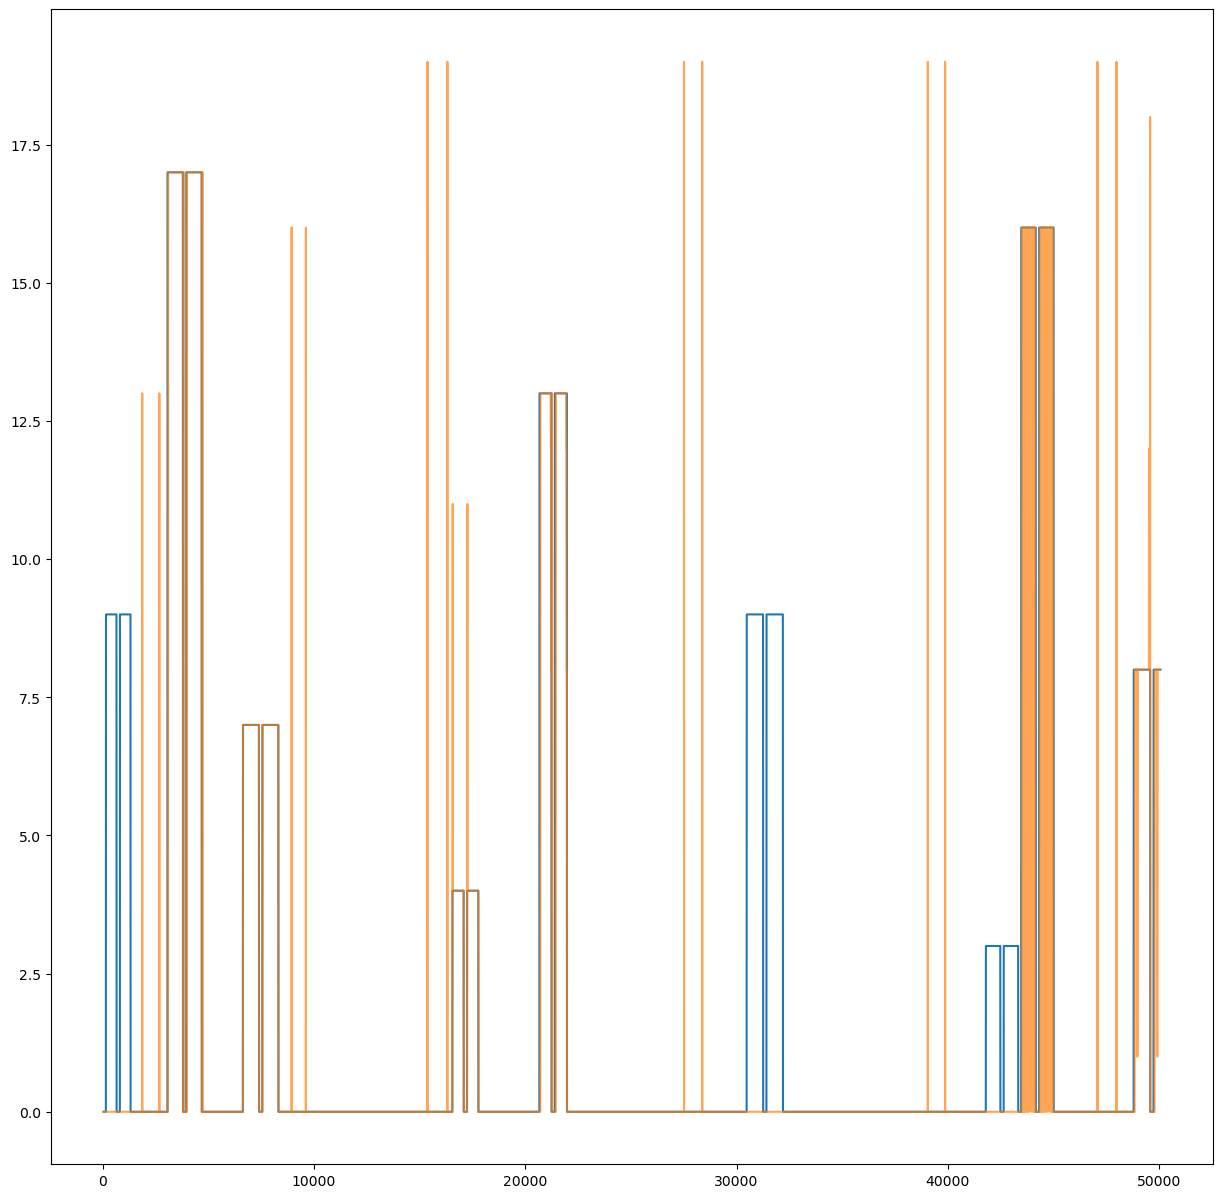

In [ ]:
results_df = pd.DataFrame({
    'Actual': comb_y_df_test_stitch.iloc[50:],
    'Predicted': predictions,
    'Correct': comb_y_df_test_stitch.iloc[50:]== predictions
})

plt.figure(figsize=(15, 15))
conf_matrix = confusion_matrix(results_df['Actual'],
                               results_df['Predicted'])

accuracy = accuracy_score(results_df['Actual'],
                               results_df['Predicted'])
print(f"Accuracy: {accuracy}")

plt.plot(results_df['Actual'].iloc[:50000])
plt.plot(results_df['Predicted'].iloc[:50000],alpha=0.7)
plt.show()

In [ ]:
fault_starts = results_df[results_df['Actual'].diff() > 0].index
faults = results_df[results_df['Actual'].diff() > 0]
from collections import defaultdict
new_columns = defaultdict(list)
for idx in range(len(fault_starts)):
    new_columns['index'].append(fault_starts[idx])
    fault_value = faults['Actual'].iloc[idx]  # Assuming 'Actual' holds the fault values
    new_columns['fault'].append(fault_value)
    first_fault_start = fault_starts[idx] if not fault_starts.empty else None
    fpf = results_df.loc[first_fault_start:][results_df['Predicted'].diff() > 0].index.min()
    new_columns['fpf'].append(fpf)
    diff = fpf - fault_starts[idx]
    new_columns['diff'].append(diff)

df_my = pd.DataFrame(new_columns)

C:\Users\mansimra\AppData\Local\Temp\ipykernel_15556\2132548172.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fpf = results_df.loc[first_fault_start:][results_df['Predicted'].diff() > 0].index.min()
C:\Users\mansimra\AppData\Local\Temp\ipykernel_15556\2132548172.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fpf = results_df.loc[first_fault_start:][results_df['Predicted'].diff() > 0].index.min()
C:\Users\mansimra\AppData\Local\Temp\ipykernel_15556\2132548172.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fpf = results_df.loc[first_fault_start:][results_df['Predicted'].diff() > 0].index.min()
C:\Users\mansimra\AppData\Local\Temp\ipykernel_15556\2132548172.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fpf = results_df.loc[first_fault_start:][results_df['Predicted'].diff() > 0].index.min()
C:\Users\mansimra\AppData\Local\Temp\ipykernel_1

In [ ]:
anotherone = results_df.groupby(['Actual']).agg({'Predicted':'count', 'Correct':'sum'})
anotherone['accuracy'] = anotherone['Correct']/anotherone['Predicted']

In [ ]:
anotherone

,Predicted,Correct,accuracy
Actual,,,
0,620598,618477,0.996582
1,7272,7165,0.985286
2,13606,13253,0.974056
3,7854,0,0.000000
4,6982,6922,0.991406
5,11162,10721,0.960491
6,5210,5206,0.999232
7,10680,10638,0.996067
8,4220,3387,0.802607


In [ ]:
df_my.dropna(inplace=True)
df_my2=df_my.loc[df_my['diff']<10]

fault
1     12
2      2
4     12
5     16
6      8
7     16
9      2
10     2
11     6
12     6
14    26
15     2
16     2
19     4
20     2
Name: diff, dtype: int64

In [ ]:
results_df_my = pd.DataFrame({
    'Actual': df_my.groupby(['fault']).count()['diff'],
    'Predicted': df_my2.groupby(['fault']).count()['diff'],
    'Correct': df_my2.groupby(['fault']).count()['diff']/df_my.groupby(['fault']).count()['diff']
})

In [ ]:
results_df_my['Correct Predictions']=anotherone['accuracy'][1:]
results_df_my

,Actual,Predicted,Correct,Correct Predictions
fault,,,,
1,12,12.0,1.000000,0.985286
2,22,2.0,0.090909,0.974056
3,12,NaN,NaN,0.000000
4,12,12.0,1.000000,0.991406
5,16,16.0,1.000000,0.960491
6,8,8.0,1.000000,0.999232
7,16,16.0,1.000000,0.996067
8,6,NaN,NaN,0.802607
9,8,2.0,0.250000,0.000000


In [ ]:
del newgroup
newgroup = combined_df.loc[(combined_df['simulationRun']==50) & (combined_df['faultNumber']==0)].groupby("sample").mean()

import pandas as pd
import numpy as np

autocorrelation = []
rr = []

featuring = top_10_indices

for feature in featuring:
    autocorrelation = []
    rr = []
    for lag in range(1, 60):
        autocorrelation.append(newgroup.iloc[:,feature+1].autocorr(lag=lag))
        rr.append(lag)
    plt.figure(figsize=[3,3])
    plt.plot(rr, autocorrelation)
    plt.xlabel('Number of Lags')
    plt.ylabel('Autocorrelation')
    plt.title(columns_list[feature])
    plt.ylim([-0.5, 1])
    plt.show()


NameError: name 'newgroup' is not defined

In [ ]:
Fs = 1/(180)

Ts = 1/Fs #Hour per samples
t = np.arange(0, 25*60*60, Ts)

t.shape

In [ ]:
column_name = combined_df.columns[top_10_indices[3] + 2]

selected_data = combined_df.loc[(combined_df['simulationRun'] == 50) & (combined_df['faultNumber'] == 0), column_name]

In [ ]:
column_name = combined_df.columns[top_10_indices[3] + 2]

selected_data = combined_df.loc[(combined_df['simulationRun'] == 50) & (combined_df['faultNumber'] == 0), column_name]
Y = np.fft.fft(selected_data)

N = len(Y)//2

freqs = np.fft.fftfreq(len(selected_data), Ts)[:N]

plt.figure(figsize=(12, 6))
plt.plot(freqs[1:N], 2.0/N * np.abs(Y[1:N]))
plt.title('Frequency Spectrum of the Signal')
plt.xlabel('Frequency (1/hr)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

indice = np.argsort(2.0/N * np.abs(Y[1:N]))[-1:]

print(indice)

#1.0219307
2.0/N * np.abs(Y[indice+1])

(1/freqs[indice+1])/60

In [ ]:
featuring = top_10_indices

for feature in featuring:
    column_name = combined_df.columns[feature + 2]

    selected_data = combined_df.loc[(combined_df['simulationRun'] == 20) & (combined_df['faultNumber'] == 0), column_name]
    Y = np.fft.fft(selected_data)

    N = len(Y)//2

    freqs = np.fft.fftfreq(len(selected_data), Ts)[:N]

    indice = np.argsort(2.0/N * np.abs(Y[1:N]))[-1:]

    print((1/freqs[indice+1])/60)


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, selected_data)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Most variables have a low degree of autocorrelation. To reduce to a value of 0.5, the median amount of time is just 3 minutes

In [ ]:
newgroup2 = combined_df
plt.figure(figsize=(40,40))
cormatrix=newgroup2.corr()
sns.heatmap(cormatrix, fmt=".1g",cmap='coolwarm',annot=True)
plt.show()

In [ ]:
ng = combined_df.loc[(combined_df['simulationRun']==500)].groupby(combined_df['sample']).mean().copy()
j = [10, 20, 40]
featuring = top_10_indices[0:2]

for feature in featuring:
    feature_name = columns_list[feature]
    plt.plot(ng['sample'],ng[feature_name])
    for i in j:
      name = columns_list[feature] + str(i)
      rolling_mean = ng[feature_name].rolling(window=i, center=False).mean()
      ng[name] = rolling_mean.fillna(ng[feature_name])
      plt.plot(ng['sample'],ng[name])
    plt.show()






In [ ]:
ng

In [ ]:
ng['xmv_3']

In [ ]:
combined_df